# Task 1: Counting items using different data structures

In one of our research projects, we examined whether German X users would see politically balanced news feeds if they followed comparable leading politicians from each federal parliamentary party of Germany. We created two likewise "sock-puppet" X accounts, made them follow the same set of German politicians, roughly the same number from each German political party, and tracked their feeds through January 2025, right before the 2025 German federal election. We found that only 20% of posts shown in the For You feed are from the users followed by the feed owner. The attached file `users.txt` contains a log of users whose tweets appeared in the For You feeds during our experiment. **You are asked to compute the number of times each user appeared in the For You feed.**

If you're interested in our study, you can read more about it [here](https://uncommongood.substack.com/p/political-biases-on-x-before-the).

In [60]:
# load users from a file and convert to a list
users = []
with open("users.txt", "r") as f:
    for line in f:
        users.append(line.strip())

len(users)

90332

## Task 1.1: Time complexity
The count of user appearances in the For You feed can be computed in different ways using different data structures. Each approach and data structure may result in a different time complexity of your solution. Your goal is to analyze and complete the following three solutions (i.e., functions `count_users_1`, `count_users_2`, and `count_users_3`), provide the time complexity of each function using Big-$\mathcal{O}$ notation, and explain your reasoning behind the provided time complexity. You will notice that some of the functions take more time to run than others.

In this specific case, you will work with the attached data file, `users.txt`, containing $n=90332$ user appearances, but you can imagine that this file could be much larger, if our experiment was run for multiple months, rather than just one month. Also, the number of **unique** users appearing in this file could vary. We refer to the count of unique users as $k<n$.

Please provide time complexity with respect to both $n$ and $k$. For instance, your code can have $\mathcal{O}(n)$ or $\mathcal{O}(n+k)$ or $\mathcal{O}(k^2)$ or $\mathcal{O}(k \log n)$ or another complexity.

### Function `count_users_1`

Here is the first "Pythonic" function computing the counts of users appearing in the For You feed of X. What's the time complexity of `count_users_1` and why? In your answer, reason about the complexity of the `count()` function, given your knowledge of Python `list`. Please provide your answer in the space below. 

Please note that we ask for time complexity of the function `count_users_1` **only**, without considering the complexity of the other parts of the code, e.g., the function `sorted`.

In [61]:
def count_users_1(users):
    # you can see the documentation of the count() method and its code in case you want to confirm your understanding:
    # https://docs.python.org/3/tutorial/datastructures.html
    # https://github.com/python/cpython/blob/main/Objects/listobject.c#L3274
    return {user: users.count(user) for user in users}

user_count = count_users_1(users)
ranking = sorted(user_count.items(), key=lambda item: item[1], reverse=True)
ranking[0:10]

[('https://x.com/elonmusk', 7583),
 ('https://x.com/RealAlexJones', 2260),
 ('https://x.com/Dennis_Hohloch', 1724),
 ('https://x.com/BrandnerSt', 1719),
 ('https://x.com/narendramodi', 1674),
 ('https://x.com/NurderK', 1669),
 ('https://x.com/Alice_Weidel', 1618),
 ('https://x.com/AHuxley1963', 1310),
 ('https://x.com/baha_jam', 1260),
 ('https://x.com/realDonaldTrump', 1250)]

#### WRITE YOUR ANSWERS BELOW
Time complexity of `count_users_1` is $\mathcal{O}(n^2)$, because we are going through all the users in the list and finds the count of the users individually. This means that it finds the count of the same user multiple times. We are using the count function which is $\mathcal{O}(n)$ and we are looping through all the users which is $\mathcal{O}(n)$ which makes it $\mathcal{O}(n^2)$.

### Function `count_users_2`

Now complete the following implementation, which uses only one data structure: a `defaultdict`. If you don't know what it is, read its [documentation/examples](https://docs.python.org/3/library/collections.html#defaultdict-examples). Try to write an efficient implementation that has a good time complexity. What is its time complexity and why? What kind of a data structure is Python's `dict`?

In [62]:
from collections import defaultdict

def count_users_2(users):
    user_count = defaultdict(int)
    for user in users:
        user_count[user]+=1
    return user_count

user_count = count_users_2(users)
ranking = sorted(user_count.items(), key=lambda item: item[1], reverse=True)
ranking[0:10]

[('https://x.com/elonmusk', 7583),
 ('https://x.com/RealAlexJones', 2260),
 ('https://x.com/Dennis_Hohloch', 1724),
 ('https://x.com/BrandnerSt', 1719),
 ('https://x.com/narendramodi', 1674),
 ('https://x.com/NurderK', 1669),
 ('https://x.com/Alice_Weidel', 1618),
 ('https://x.com/AHuxley1963', 1310),
 ('https://x.com/baha_jam', 1260),
 ('https://x.com/realDonaldTrump', 1250)]

#### WRITE YOUR ANSWERS BELOW
Time complexity of `count_users_2` is $\mathcal{O}(n)$, because we are iterating through the users and increasing the value of the users key in the dictionary by 1 everytime we see the user. Peaking in a dictionary is $\mathcal{O}(1)$. So the overall time complexity is $\mathcal{O}(n)$

### Function `count_users_3`

Finally, implement it using Python lists for storing a **set** of (unique) users and the count of feed appearances for each of these users. Your implementation should resemble the simple array-based implementation of set ADT from our tutorial and lab. What is the time complexity of the resulting function and why? 

*Extra challenging question*: Could this time complexity be reduced by using binary search? You don't need to implement this more efficient version, unless this helps you to reason about it. Think about it carefully. Then, make sure to provide the Big-$\mathcal{O}$ time complexity of this alternative implementation and to sufficiently describe your reasoning.

In [63]:
def count_users_3(users):
    users_set = []
    counts = []
    # ADD YOUR CODE HERE! it should resemble array-based implementation of set ADT, but you can make use of Python's list index() function

    for user in users:
        if user not in users_set:
            users_set.append(user)
            counts.append(1)
        else:
            counts[users_set.index(user)]+=1

    return dict(zip(users_set, counts))

user_count = count_users_3(users)
ranking = sorted(user_count.items(), key=lambda item: item[1], reverse=True)
ranking[0:10]

[('https://x.com/elonmusk', 7583),
 ('https://x.com/RealAlexJones', 2260),
 ('https://x.com/Dennis_Hohloch', 1724),
 ('https://x.com/BrandnerSt', 1719),
 ('https://x.com/narendramodi', 1674),
 ('https://x.com/NurderK', 1669),
 ('https://x.com/Alice_Weidel', 1618),
 ('https://x.com/AHuxley1963', 1310),
 ('https://x.com/baha_jam', 1260),
 ('https://x.com/realDonaldTrump', 1250)]

#### WRITE YOUR ANSWERS BELOW
Time complexity of `count_users_3` is $\mathcal{O}(n.k)$, because we are looping through all the users and checking if it already exist in the users_set or not. Looping through all the users in $\mathcal{O}(n)$ and finding our users from k users will be $\mathcal{O}(k)$. Hence the time complexity of count_users is $\mathcal{O}(n.k)$


This time complexity can be reduced by using binary search...


## Task 1.2: Empirical evaluation

Next, generate figures that show how running time changes with $n$ to verify empirically whether your Big-$\mathcal{O}$ complexity with respect to $n$ is as you expected. We don't ask you to verify it with respect to $m$, but if you're uncertain, you may want to do it on your own. Finally, answer the question at the bottom of this section.

Note that the size of `users.txt` is fixed. To change input size, $n$, without changing the number of unique users $k$, we can multiply input size by cloning and concatenating the original input multiple times, as shown below. We recommend that you don't use more size multipliers than `range(4)` or `range(5)` for  `count_users_1` and `count_users_3`. For `count_users_2` you should use as many size multipliers as needed to sufficiently showcase time complexity.

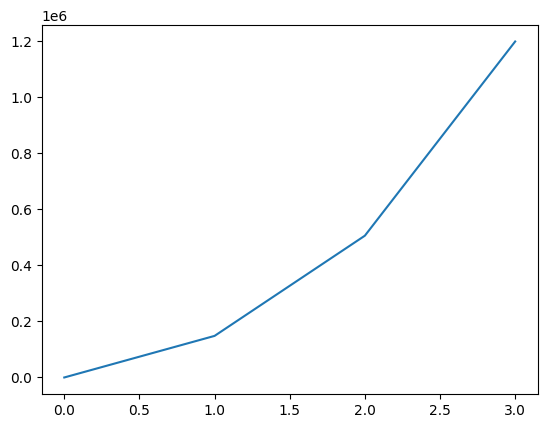

In [64]:
import time
runingtimes = []

size_multipliers = range(4)

# ADD YOUR CODE HERE! 
# possibly by copy-paste it from the Lab 1 Notebook
# and then copy-paste and modify it for the count_users_2 and count_users_3 functions
for size_multiplier in size_multipliers:
    start = time.time()
    count_users_1(users*size_multiplier)
    end = time.time()
    runingtime = (end - start)*1000
    runingtimes.append(runingtime)

import matplotlib.pyplot as plt
plt.plot(size_multipliers, runingtimes)
plt.show()

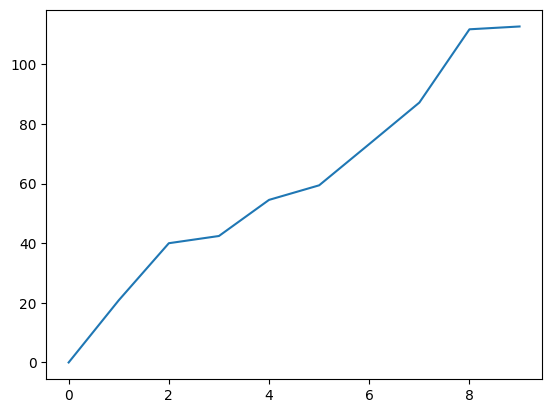

In [65]:
import time
runingtimes = []

size_multipliers = range(10)

# ADD YOUR CODE HERE! 
# possibly by copy-paste it from the Lab 1 Notebook
# and then copy-paste and modify it for the count_users_2 and count_users_3 functions
for size_multiplier in size_multipliers:
    start = time.time()
    count_users_2(users*size_multiplier)
    end = time.time()
    runingtime = (end - start)*1000
    runingtimes.append(runingtime)

import matplotlib.pyplot as plt
plt.plot(size_multipliers, runingtimes)
plt.show()

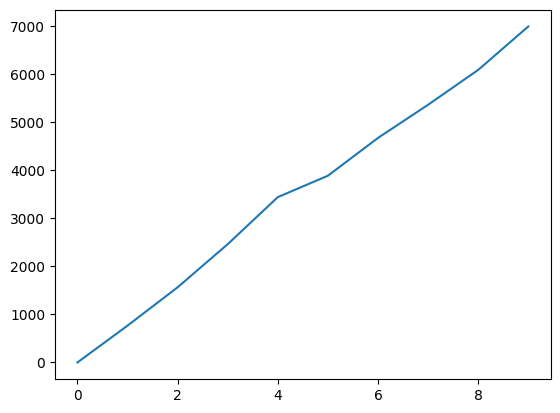

In [66]:
import time
runingtimes = []

size_multipliers = range(10)

# ADD YOUR CODE HERE! 
# possibly by copy-paste it from the Lab 1 Notebook
# and then copy-paste and modify it for the count_users_2 and count_users_3 functions
for size_multiplier in size_multipliers:
    start = time.time()
    count_users_3(users*size_multiplier)
    end = time.time()
    runingtime = (end - start)*1000
    runingtimes.append(runingtime)

import matplotlib.pyplot as plt
plt.plot(size_multipliers, runingtimes)
plt.show()

#### WRITE YOUR ANSWERS BELOW
What do you observe? How do the resulting figures compare with the Big-$\mathcal{O}$ time complexity that you expected for each counting algorithm? Which of the three counting algorithms is the slowest, which one is the fastest? Why?

#### ANSWER :

count_users_1() with a Big-$\mathcal{O(n^2)}$ time complexity takes a lot of time to finish. The sample sizes were increased upto a maximum of 4 times and the time complexity was checked. Looking at the plot, we can see that it matches our expectation of a quadratic plot.  

count_users_2() with a Big-$\mathcal{O(n)}$ time complexity completes really fast. Even when the sample sizes are increased 10 times, the time taken is very low and the plot checks out. It is a linear time complexity.

count_users_3() with a Big-$\mathcal{O(n.k)}$ time complexity doesn't take as much time as count_users_1() but still a lot slower than count_users_2(). With the sample sizes increased upto 10 times, the plot is not what we expected. We expect a quadratic plot, but we get more or else a linear plot since our k is the same for all the sample. It is like we can actaully treat k as a constant. In the case we increase our sample size and bring new users to the users.txt file, we may see a graph that is more likely to be a quadratic graph.

The speeds of the algorithms ranked from best to worst is a follows:
count_users_2() > count_users_3() > count_users_1()

count_users_2() is the fastest because it uses a dictionary which is actaully a hashmap and lookups in a hashmap is Big-$\mathcal{O(1)}$ which makes it a lot easier to count the users with Big-$\mathcal{O(n)}$

count_users_3() is a bit slowers because it uses list to store and lookups in a list is Big-$\mathcal{O(n)}$ and since the list may only contain a maximum of k elements, we can write it as Big-$\mathcal{O(k)}$ and going through all the users takes another Big-$\mathcal{O(n)}$ which gives us Big-$\mathcal{O(n.k)}$

count_users_2() is the slowest because it goes through each user in the list and checks the count of the user. Which means that for a single given user, it checks their count multiple time. Looping through the list takes Big-$\mathcal{O(n)}$ and counting the number of times a particular user is in the list takes another Big-$\mathcal{O(n)}$ which gives Big-$\mathcal{O(n^2)}$ that takes a lot of time. 

# Task 2: Time complexity of linear and binary search algorithms

You're asked to implement two search algorithms. Their inputs are: a sorted array (of size $n$) and a search target value. More specifically:
1. Implement a linear search algorithm that simply iterates over the array. You can use the `index()` function.
2. Implement a binary search algorithm: recursive or iterative.
3. Demonstrate briefly, e.g., via a unit test, that the algorithms work correctly, e.g., find the value if it's in the array or return `None` if it's not in the array.
4. What is the worst-case time complexity of these two algorithms in Big-$\mathcal{O}$ notation? 
5. For each algorithm, measure and plot the average running times as a function of $n$ for, say, 50 random inputs and as many different values of $n$ as it's needed to identify how the running time depends on $n$. You can generate random inputs using the code attached below. Note that, even after averaging, you will observe some noise, e.g., due to other processes running on the machine.
6. Use a curve-fitting function, e.g., from Scipy, to identify how the measured average-case running time depends on $n$. You'll find an example of Scipy's curve fitting function [here](https://www.askpython.com/python/examples/curve-fitting-in-python). Plot the fitted function on top of the respective figure showing average running time. In this way, you should verify whether the average-case running time corresponds to the worst-case Big-$\mathcal{O}$ time complexity of each algorithm. 
7. Which of these two search algorithms if more efficient on average for very large arrays and why?

Here is an example of how you can generate random sorted arrays of different sizes:

In [67]:
import random
n = 100
array = random.sample( range(10000), n)
target = random.sample( range(10000), 1)[0]
array.sort()
print(array)
print(target)

[140, 217, 419, 573, 608, 648, 728, 733, 900, 922, 996, 1076, 1200, 1265, 1353, 1382, 1430, 1527, 1564, 1572, 1678, 1823, 2180, 2211, 2308, 2396, 2592, 2980, 3060, 3181, 3191, 3201, 3266, 3340, 3358, 3384, 3656, 3976, 4155, 4243, 4445, 4707, 4761, 4938, 4963, 5002, 5225, 5245, 5379, 5445, 5558, 5559, 5593, 5604, 5615, 5650, 5825, 6152, 6186, 6228, 6268, 6427, 6530, 6726, 6775, 6783, 6962, 7067, 7102, 7115, 7165, 7234, 7245, 7307, 7363, 7467, 7730, 7755, 7785, 7870, 7919, 7937, 7971, 7994, 8208, 8460, 8474, 8682, 8775, 8915, 8982, 9000, 9184, 9234, 9263, 9301, 9409, 9557, 9620, 9809]
5983


## WRITE YOUR ANSWERS BELOW, INCLUDING CODE AND PLOTS

#### 1. Implement a linear search algorithm that simply iterates over the array. You can use the `index()` function.

In [68]:
def linear_search(nums, target):
    for index, num in enumerate(nums):
        if num == target:
            return index
        
    return None

#### 2. Implement a binary search algorithm: recursive or iterative.

In [69]:
def binary_search(nums, target):
    left = 0
    right = len(nums) - 1
    while left <= right:
        mid = (left + right) // 2

        if nums[mid] == target:
            return mid
        elif nums[mid] > target:
            right = mid - 1
        elif nums[mid] < target:
            left = mid + 1
    
    return None

#### 3. Demonstrate briefly, e.g., via a unit test, that the algorithms work correctly, e.g., find the value if it's in the array or return `None` if it's not in the array.

In [70]:
array = list(range(0, 10))

assert linear_search(array, 5) is not None
assert binary_search(array, 5) is not None

assert binary_search(array, -1) is None
assert binary_search(array, -1) is None

#### 4. What is the worst-case time complexity of these two algorithms in Big-$\mathcal{O}$ notation? 

1. Linear search : The worst case time complexity is when the element to be found is either at the end or is not in the list at all. Time complexity is Big-$\mathcal{O(n)}$

2. Binary search : The worst case time complexity is when the element to be found is start or end, or its not in the list at all. 
Time complexity is Big-$\mathcal{O(log(n))}$

#### 5. For each algorithm, measure and plot the average running times as a function of $n$ for, say, 50 random inputs and as many different values of $n$ as it's needed to identify how the running time depends on $n$. You can generate random inputs using the code attached below. Note that, even after averaging, you will observe some noise, e.g., due to other processes running on the machine.

#### 6. Use a curve-fitting function, e.g., from Scipy, to identify how the measured average-case running time depends on $n$. You'll find an example of Scipy's curve fitting function [here](https://www.askpython.com/python/examples/curve-fitting-in-python). Plot the fitted function on top of the respective figure showing average running time. In this way, you should verify whether the average-case running time corresponds to the worst-case Big-$\mathcal{O}$ time complexity of each algorithm. 

Linear search - Average running times plots

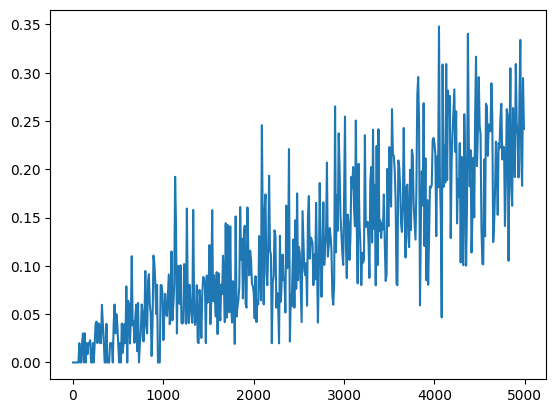

In [71]:
# you can use this as your starting code
import time
runingtimes = []

nvalues = range(1, 5000, 10)
for n in nvalues:
    runingtime = 0
    nsamples = 50
    for i in range(nsamples):
        array = random.sample( range(10000), n)
        target = random.sample( range(10000), n)[0]
        start = time.time()
        linear_search(array, target)
        end = time.time()

        runingtime += (end - start) * 1000

    runingtimes.append(runingtime/nsamples)

import matplotlib.pyplot as plt
plt.plot(nvalues, runingtimes)
plt.show()

Linear search - Fitted plot

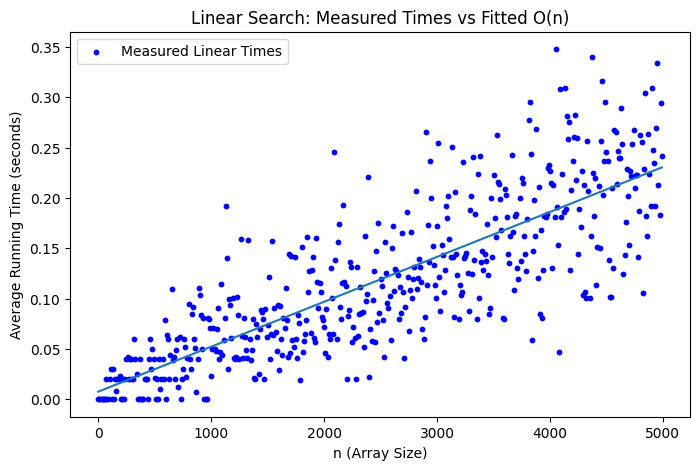

In [72]:
import numpy as np
from scipy.optimize import curve_fit

nvalues_linear = np.array(list(nvalues), dtype=float)
times_linear = np.array(runingtimes, dtype=float)

def linear_model(n, a, b):
    return a * n + b

popt_lin, _ = curve_fit(linear_model, nvalues_linear, times_linear)
a_lin, b_lin = popt_lin

plt.figure(figsize=(8, 5))
plt.scatter(nvalues_linear, times_linear, label="Measured Linear Times", color="blue", s=10)

# Generate smooth curve for the fitted linear model
n_lin_smooth = np.linspace(min(nvalues_linear), max(nvalues_linear), 200)
fitted_lin = linear_model(n_lin_smooth, a_lin, b_lin)
plt.plot(n_lin_smooth, fitted_lin)

plt.xlabel("n (Array Size)")
plt.ylabel("Average Running Time (seconds)")
plt.title("Linear Search: Measured Times vs Fitted O(n)")
plt.legend()
plt.show()

### We can see that the average case running times plot is the same plot as a worst case of Big-$\mathcal{O(n)}$

Binary search - Average running times plots

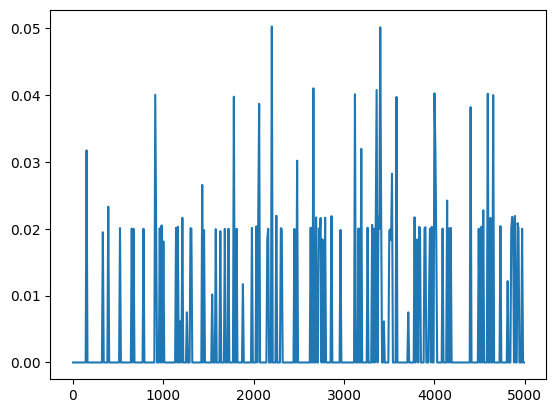

In [73]:
# you can use this as your starting code
import time
runingtimes = []

nvalues = range(1, 5000, 10)
for n in nvalues:
    runingtime = 0
    nsamples = 50
    for i in range(nsamples):
        array = random.sample( range(10000), n)
        target = random.sample( range(10000), n)[0]
        array.sort()
        start = time.time()
        binary_search(array, target)
        end = time.time()

        runingtime += (end - start) * 1000

    runingtimes.append(runingtime/nsamples)

import matplotlib.pyplot as plt
plt.plot(nvalues, runingtimes)
plt.show()

Binary search - Fitted plot

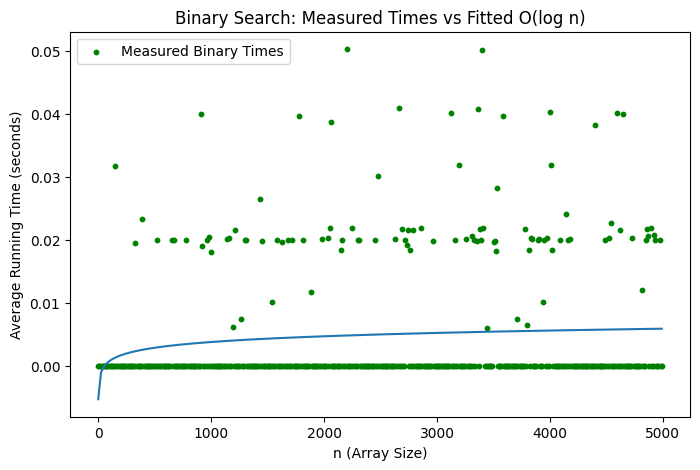

In [74]:
nvalues_binary = np.array(list(nvalues), dtype=float)
times_binary = np.array(runingtimes, dtype=float)

def log_model(n, a, b):
    return a * np.log(n) + b

popt_bin, _ = curve_fit(log_model, nvalues_binary, times_binary)
a_bin, b_bin = popt_bin

plt.figure(figsize=(8, 5))
plt.scatter(nvalues_binary, times_binary, label="Measured Binary Times", color="green", s=10)

# Generate smooth curve for the fitted log model
n_bin_smooth = np.linspace(min(nvalues_binary), max(nvalues_binary), 200)
fitted_bin = log_model(n_bin_smooth, a_bin, b_bin)
plt.plot(n_bin_smooth, fitted_bin)

plt.xlabel("n (Array Size)")
plt.ylabel("Average Running Time (seconds)")
plt.title("Binary Search: Measured Times vs Fitted O(log n)")
plt.legend()
plt.show()

### We can see that the average case running times plot is the same plot as a worst case of Big-$\mathcal{O(log(n))}$

#### 7. Which of these two search algorithms if more efficient on average for very large arrays and why?

We can see from the fitted plots that for higher values of n, the linear search on average takes longer to find the value. And for higher values of n, the binary search on average takes almost 0 seconds. 